In [1]:
# Import the modules

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pathlib import Path
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_lending_data = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df_lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# review the df info
df_lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features
y = df_lending_data['loan_status']


# Separate the y variable, the labels

# Separate the X variable, the features
X = df_lending_data.drop('loan_status', axis=1)


In [5]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [6]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
value_counts = y.value_counts()

value_counts

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)
# Assign a random_state of 1 to the function
# X_train, X_test, y_train, y_test 

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
# from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(solver = 'lbfgs', max_iter =200, random_state =1)
# Assign a random_state parameter of 1 to the model

# Fit the model using training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
y_prediction = model.predict(X_test)


y_prediction_df = pd.DataFrame({'y_test': y_test, 'y_prediction': y_prediction})

y_prediction_df

,y_test,y_prediction
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
30965,0,1
30996,0,0
69036,0,0
23886,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [11]:

# calculate the accuracy
accuracy = accuracy_score(y_test, y_prediction)

# print the accuracy

print("The Accuracy Score is:", accuracy)

The Accuracy Score is: 0.9921975754449317


In [12]:
# calculate the balance_accuracy_score

In [13]:
balanced_accuracy = balanced_accuracy_score (y_test, y_prediction)
# print the balance_accuracy_score
print("The Balance_Accuracy_Score is:", balanced_accuracy)

The Balance_Accuracy_Score is: 0.9521352751368186


In [14]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_prediction)
# print the confusion matrix


print("Fonfusion matrix is:")
print(cm)

Fonfusion matrix is:
[[14926    75]
 [   46   461]]


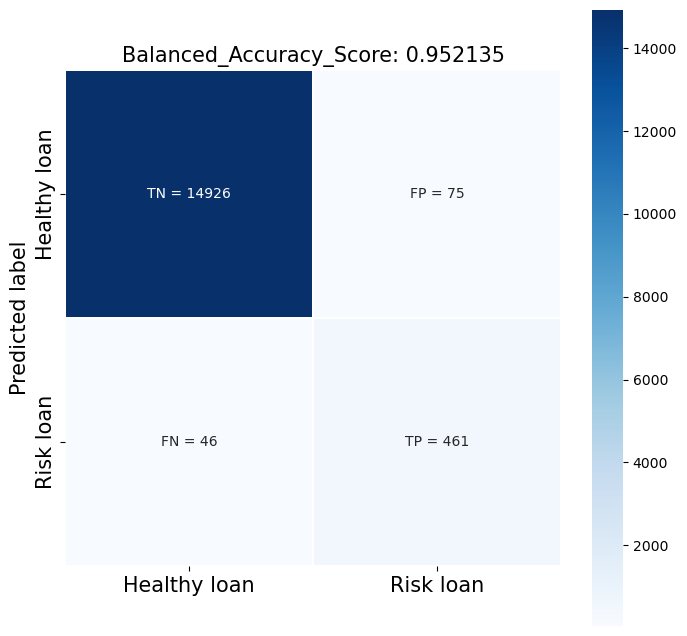

In [15]:
# create a list to store  the TN, FP, FN, TP values for plotting
modified_cm = []
for index, value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index ==1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])
        
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="", 
            linewidths=.10,
            square=True, 
            cmap='Blues',
            xticklabels=['Healthy loan', 'Risk loan'],
            yticklabels=['Healthy loan', 'Risk loan'],
);

plt.ylabel('Accual label', fontsize =15);
plt.ylabel('Predicted label', fontsize =15);
plt.title('Balanced_Accuracy_Score: {:3f}'.format(balanced_accuracy), size =15);
plt.tick_params(labelsize= 15)

In [26]:
# Print the classification report for the model
print("Confusion Matrix")
display(cm)
m1br = balanced_accuracy
print(f"Accuracy Score : {accuracy}")
print("Classification Report")
m1cr = classification_report(y_test, y_prediction)
print(m1cr)
print(m1cr)
# "The Balance_Accuracy_Score is:"

Confusion Matrix


array([[14926,    75],
       [   46,   461]])

Accuracy Score : 0.9921975754449317
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508

0.9941749445500477


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**the logistic regression model indicate that the total number predicted are positive. for instance for 0, the prediction was 1.00 (healthy loans) and for 1, the precissionis 0.86.
the ratio of true positives  to the total number of actual positives. for class 0 the precission number is 1.00 and for class 1 the precission number is 91% are correctly identified by the model.

for F1 score who represent the harmonic mean and precission and recall, and is a combined measure of precission and recall. for class 0, the F1 score is 1.00 which indicates high performance. for class 1, the F1 score is 0.88, which indicates the the model is not performing as well on this calss compared to class 0

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [17]:
# Import the RandomOverSampler module form imbalanced-learn


# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
oversampler = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)



In [18]:
# Count the distinct values of the resampled labels data
print("Original training values:", y_train.value_counts())
print("Resampled training data:", pd.Series(y_train_resampled).value_counts())


Original training values: 0    60035
1     1993
Name: loan_status, dtype: int64
Resampled training data: 0    60035
1    60035
Name: loan_status, dtype: int64


### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [19]:
# Import the LogisticRegression module from SKLearn
# from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model_1 = LogisticRegression(solver = 'lbfgs', max_iter =200, random_state =1)

# Fit the model using the resampled training data
model_1.fit(X_train_resampled, y_train_resampled)


# Make a prediction using the testing data
y_prediction = model_1.predict(X_test)


y_prediction_df = pd.DataFrame({'y_test': y_test, 'y_prediction': y_prediction})

y_prediction_df

,y_test,y_prediction
60914,0,0
36843,0,0
1966,0,0
70137,0,0
27237,0,0
...,...,...
30965,0,1
30996,0,0
69036,0,0
23886,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Print the balanced_accuracy score of the model 
# calculate the accuracy
balanced_accuracy = balanced_accuracy_score (y_test, y_prediction)
# print the balance_accuracy_score
print("The Balance_Accuracy_Score is:", balanced_accuracy)

The Balance_Accuracy_Score is: 0.9941749445500477


In [21]:
# Generate a confusion matrix for the model
confusion_m = confusion_matrix(y_test, y_prediction)

# print the confusion matrix

print("Fonfusion matrix is:")
print(confusion_m)

Fonfusion matrix is:
[[14915    86]
 [    3   504]]


In [22]:
# Print the classification report for the model
print("Confusion Matrix")
display(cm)
print("The Balance_Accuracy_Score is:", balanced_accuracy)

print("Classification Report")
print(classification_report(y_test, y_prediction))

Confusion Matrix


array([[14926,    75],
       [   46,   461]])

The Balance_Accuracy_Score is: 0.9941749445500477
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



In [29]:
print(m1cr)
m1br

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15001
           1       0.85      0.99      0.92       507

    accuracy                           0.99     15508
   macro avg       0.93      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



0.9941749445500477

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model with the oversampled data has a precision score 1.00 for class 0, 99% for recall. 85% for Class 1 99% fro recall. so we notice that 15% of class 1 where inacuratly assign. because both classes are 99% accurate, we can say both class were assign correctly.
F1 score has 1.00 for class 0 and 92% for class 1, we constate that the regression model with oversampled data perform beter.